<a href="https://colab.research.google.com/github/ChetanKrishna07/Fruit_Recognition/blob/main/Fruit_quality_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Getting Dataset

In [1]:
!pip install kaggle

In [5]:
! mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [6]:
!cp kaggle.json ~/.kaggle/

In [7]:
!chmod 600 ~/.kaggle/kaggle.json

In [8]:
! kaggle datasets download -d sriramr/fruits-fresh-and-rotten-for-classification

100% 3.58G/3.58G [02:40<00:00, 26.3MB/s]
100% 3.58G/3.58G [02:40<00:00, 23.9MB/s]


# Importing libraries and loading the data

In [10]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import zipfile

In [11]:
# Unzip the file

zip_ref = zipfile.ZipFile('fruits-fresh-and-rotten-for-classification.zip')
zip_ref.extractall()
zip_ref.close()

In [12]:
train_dir = 'dataset/train/'
test_dir = 'dataset/test/'


In [13]:
classes = np.array(sorted(os.listdir(train_dir)))
print(classes)


['freshapples' 'freshbanana' 'freshoranges' 'rottenapples' 'rottenbanana'
 'rottenoranges']


## Visualizing the data

In [49]:
def plot_random(dir, classes):

  """
  plots a random image at a given directory from random class

  args:
    dir (string): directory of images
    classes (list or numpy array): a list of possible classes (folders in the given directory)

  returns:
    None
  """
  plt.figure(figsize=(10,5))

  for i in range(8):
    plt.subplot(2,4,i+1)
    random_class = np.random.choice(classes)
    random_file = np.random.choice(os.listdir(dir + f"/{random_class}"))
    img = tf.io.read_file(dir + f"/{random_class}/" + random_file)
    img = tf.image.decode_image(img)
    plt.imshow(img)
    plt.title(random_class)
    plt.axis("off")

  plt.show()

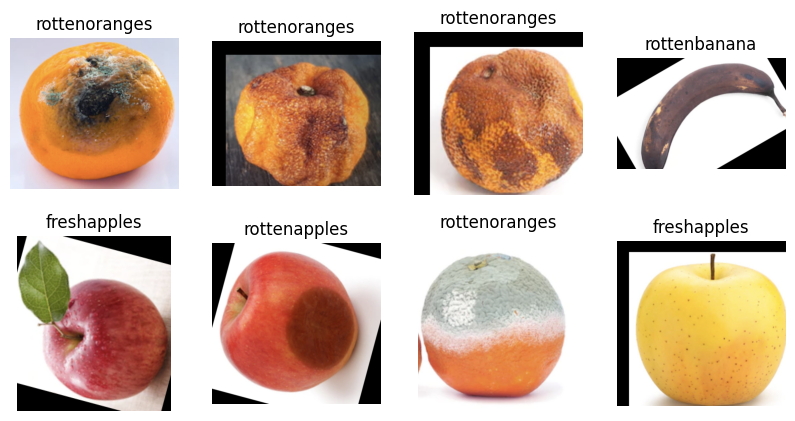

In [54]:
plot_random(train_dir, classes)

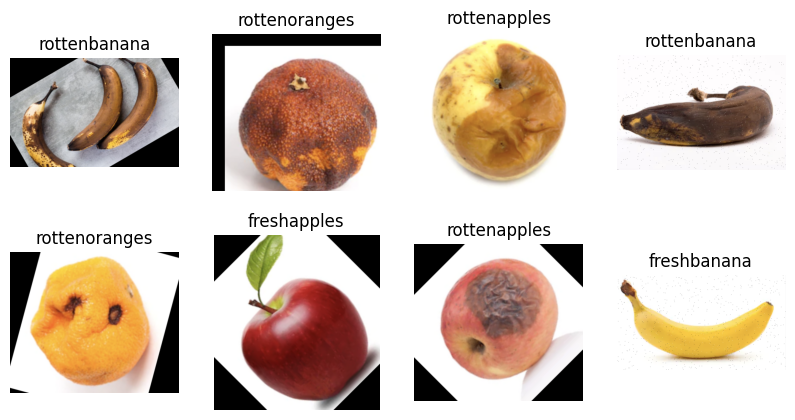

In [56]:
plot_random(test_dir, classes)

In [57]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1/255.,
                                   shear_range=0.2,
                                   zoom_range=0.2)
test_datagen = ImageDataGenerator(rescale=1/255.)


In [58]:
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode='categorical')

test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224, 224),
                                             batch_size=32,
                                             class_mode='categorical')

Found 10901 images belonging to 6 classes.
Found 2698 images belonging to 6 classes.


# Building the Model

In [64]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam

model_1 = Sequential([
    Conv2D(10, 3, input_shape=(224, 224, 3), activation='relu'),
    MaxPool2D(2),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(2),
    Flatten(),
    Dense(6, activation="softmax")
])

model_1.compile(optimizer=Adam(),
                loss='categorical_crossentropy',
                metrics=['accuracy'])

history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
341/341 [==============================] - 159s 435ms/step - loss: 0.9028 - accuracy: 0.6981 - val_loss: 0.4808 - val_accuracy: 0.8388
Epoch 2/5
341/341 [==============================] - 147s 432ms/step - loss: 0.4633 - accuracy: 0.8418 - val_loss: 0.3641 - val_accuracy: 0.8832
Epoch 3/5
341/341 [==============================] - 148s 434ms/step - loss: 0.3589 - accuracy: 0.8763 - val_loss: 0.3374 - val_accuracy: 0.8829
Epoch 4/5
341/341 [==============================] - 146s 429ms/step - loss: 0.3375 - accuracy: 0.8816 - val_loss: 0.3281 - val_accuracy: 0.8895
Epoch 5/5
341/341 [==============================] - 145s 426ms/step - loss: 0.2877 - accuracy: 0.8979 - val_loss: 0.2879 - val_accuracy: 0.9021


In [65]:

def plot_loss_curves(history):

  """
  Plots the history curve seperating valaidation and training loss and accuracy

  history: history object from model.fit

  """

  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(loss))

  # Plot loss
  plt.figure()
  plt.plot(epochs, loss, label="training_loss")
  plt.plot(epochs, val_loss, label="val_loss")
  plt.title("loss")
  plt.xlabel("epochs")
  plt.legend()

  plt.figure()
  #Plot accuracy
  plt.plot(epochs, accuracy, label="training_accuracy")
  plt.plot(epochs, val_accuracy, label="val_accuracy")
  plt.title("accuracy")
  plt.xlabel("epochs")
  plt.legend()

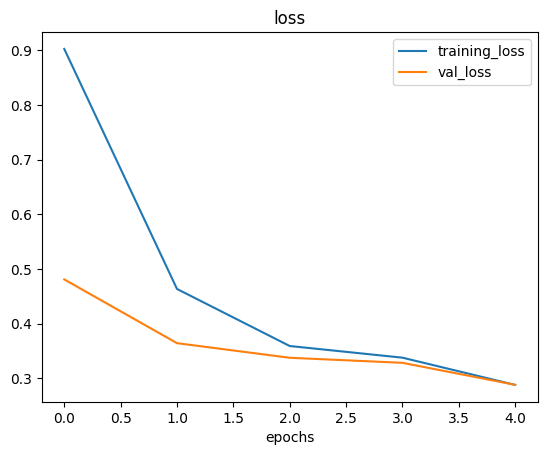

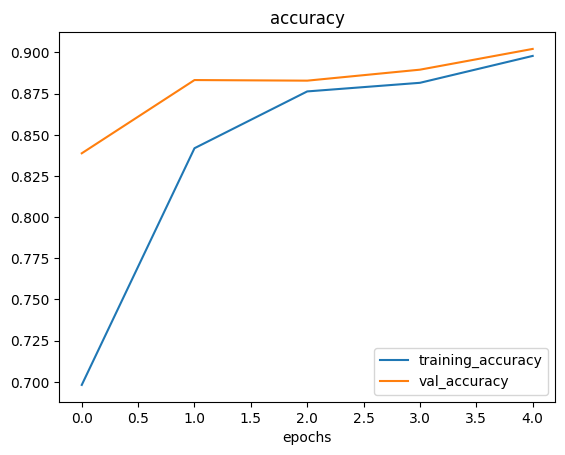

In [66]:
plot_loss_curves(history_1)

In [67]:
classes

array(['freshapples', 'freshbanana', 'freshoranges', 'rottenapples',
       'rottenbanana', 'rottenoranges'], dtype='<U13')

# Testing the model

In [68]:
zip_ref = zipfile.ZipFile('test_images.zip')
zip_ref.extractall()
zip_ref.close()

In [181]:
def pred_and_plot(model, folder, classes):
  imgs = os.listdir(folder)
  plt.figure(figsize=(15, 5))
  sub_s = int(len(imgs) / 2)
  for i in range(0, len(imgs)):
    plt.subplot(2, sub_s, i + 1)
    img = tf.io.read_file(os.path.join(folder, imgs[i]))
    img = tf.image.decode_image(img)
    img = tf.image.resize(img, (224, 224))
    img = img / 255.
    preds = model.predict(tf.expand_dims(img, axis=0), verbose=0)
    pred = np.argmax(preds)
    class_name = classes[pred]
    conf=preds[0][pred]*100
    plt.imshow(img)
    plt.title(f"{class_name} ({conf:2.2f}%)")
    plt.axis("off")
  plt.show()


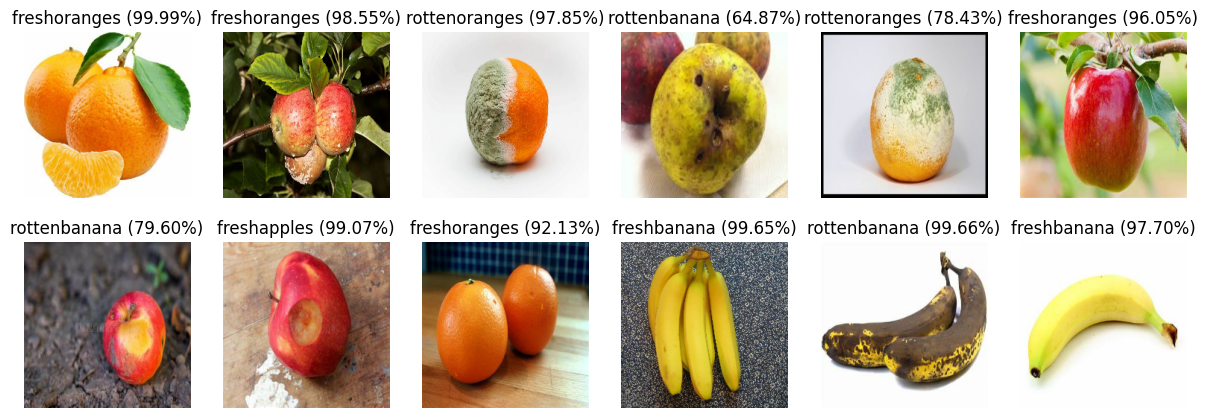

In [185]:
pred_and_plot(model_1, "./test_images/", classes)

# Try ResNet50 Model

In [112]:
import tensorflow_hub as hub
from tensorflow.keras import layers

def create_model(model_url, num_classes=10, image_shape=(224, 224)):
  """
  Takes a TensorFlow Hub URL and create a Keras Sequential Model

  Args:
    model_url (str) : A TensorFlow Hub feature extraction URL
    num_classes (int) : Number of output neurons in the output layer,
                        should be equal to the number of target classes

  Returns:
    model (tf.keras.Model) : An uncompiled keras Sequential model instance in Keras Functional API
  """

  feature_extraction_layer = hub.KerasLayer(model_url,
                                            trainable=False, # These model will be retrained, but freeze these layers which already learned the patters
                                            name="feature_extraction_layer",
                                            input_shape=image_shape+(3,))

  model = tf.keras.Sequential([
      feature_extraction_layer,
      layers.Dense(num_classes, activation="softmax", name="output_layer")
  ])

  return model


In [113]:
resnet_url = "https://tfhub.dev/google/imagenet/resnet_v2_50/feature_vector/4"
resnet_model = create_model(resnet_url, num_classes=6)

In [114]:
resnet_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 feature_extraction_layer (  (None, 2048)              23564800  
 KerasLayer)                                                     
                                                                 
 output_layer (Dense)        (None, 6)                 12294     
                                                                 
Total params: 23577094 (89.94 MB)
Trainable params: 12294 (48.02 KB)
Non-trainable params: 23564800 (89.89 MB)
_________________________________________________________________


In [115]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 111, 111, 10)      0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 54, 54, 10)        0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 29160)             0         
                                                                 
 dense_1 (Dense)             (None, 6)                 1

In [116]:
resnet_model.compile(loss='categorical_crossentropy',
                                      optimizer=Adam(),
                                      metrics=['accuracy'])

history_resnet = resnet_model.fit(train_data,
                                  epochs=5,
                                  steps_per_epoch=len(train_data),
                                  validation_data=test_data,
                                  validation_steps=len(test_data))

Epoch 1/5
341/341 [==============================] - 160s 454ms/step - loss: 0.1793 - accuracy: 0.9424 - val_loss: 0.0659 - val_accuracy: 0.9830
Epoch 2/5
341/341 [==============================] - 153s 447ms/step - loss: 0.0523 - accuracy: 0.9859 - val_loss: 0.0609 - val_accuracy: 0.9804
Epoch 3/5
341/341 [==============================] - 151s 443ms/step - loss: 0.0360 - accuracy: 0.9908 - val_loss: 0.0389 - val_accuracy: 0.9867
Epoch 4/5
341/341 [==============================] - 153s 449ms/step - loss: 0.0261 - accuracy: 0.9945 - val_loss: 0.0268 - val_accuracy: 0.9937
Epoch 5/5
341/341 [==============================] - 152s 446ms/step - loss: 0.0221 - accuracy: 0.9946 - val_loss: 0.0281 - val_accuracy: 0.9907


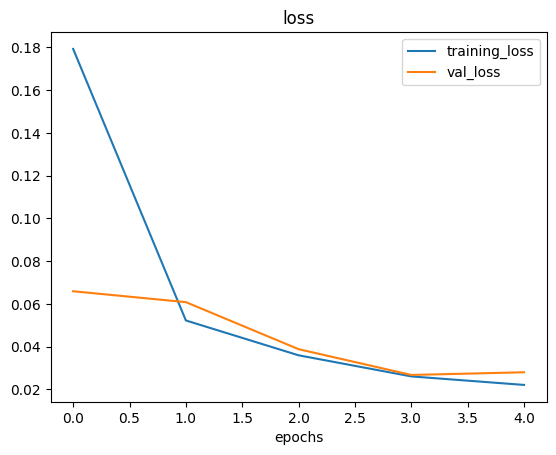

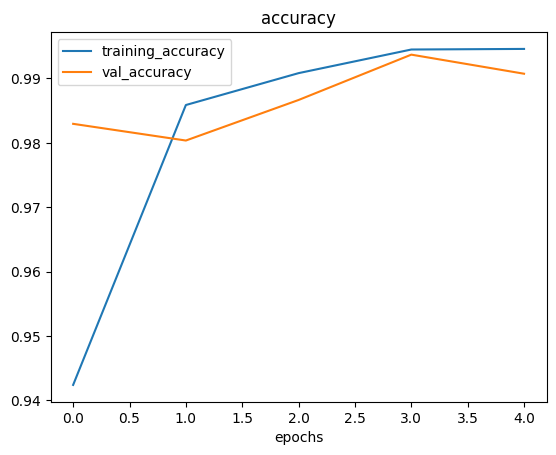

In [117]:
plot_loss_curves(history_resnet)

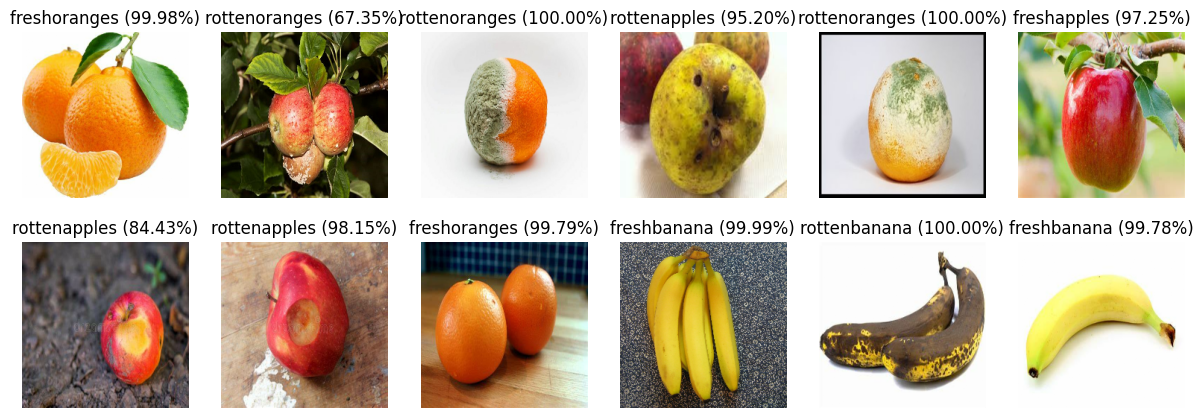

In [184]:
pred_and_plot(resnet_model, "./test_images/", classes)

In [187]:
model_1.save("fruit_quality_model_custom")
resnet_model.save("fruit_quality_model_resnet")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [190]:
tf.keras.models.load_model("fruit_quality_model_custom").evaluate(test_data)

85/85 [==============================] - 11s 131ms/step - loss: 0.2879 - accuracy: 0.9021


[0.2878616154193878, 0.9021497368812561]

In [191]:
tf.keras.models.load_model("fruit_quality_model_resnet").evaluate(test_data)

85/85 [==============================] - 12s 137ms/step - loss: 0.0281 - accuracy: 0.9907


[0.02805078588426113, 0.9907338619232178]

In [165]:
!ls -a ./test_images

.	       apple_s1.jpeg   banana_g2.jpeg	   oranges_g1.jpeg  oranges_s2.jpg
..	       apple_s2.jpeg   banana_s1.jpeg	   oranges_g2.jpeg
apple_g1.jpeg  banana_g1.jpeg  .ipynb_checkpoints  oranges_s1.jpg


In [167]:
! rm -r ./test_images/.ipynb_checkpoints/

In [192]:
!zip -r fruit_quality_model_custom.zip fruit_quality_model_custom

  adding: fruit_quality_model_custom/ (stored 0%)
  adding: fruit_quality_model_custom/variables/ (stored 0%)
  adding: fruit_quality_model_custom/variables/variables.data-00000-of-00001 (deflated 7%)
  adding: fruit_quality_model_custom/variables/variables.index (deflated 60%)
  adding: fruit_quality_model_custom/keras_metadata.pb (deflated 89%)
  adding: fruit_quality_model_custom/saved_model.pb (deflated 86%)
  adding: fruit_quality_model_custom/assets/ (stored 0%)
  adding: fruit_quality_model_custom/fingerprint.pb (stored 0%)


In [193]:
!zip -r fruit_quality_model_resnet.zip fruit_quality_model_resnet

  adding: fruit_quality_model_resnet/ (stored 0%)
  adding: fruit_quality_model_resnet/variables/ (stored 0%)
  adding: fruit_quality_model_resnet/variables/variables.data-00000-of-00001 (deflated 7%)
  adding: fruit_quality_model_resnet/variables/variables.index (deflated 80%)
  adding: fruit_quality_model_resnet/keras_metadata.pb (deflated 80%)
  adding: fruit_quality_model_resnet/saved_model.pb (deflated 92%)
  adding: fruit_quality_model_resnet/assets/ (stored 0%)
  adding: fruit_quality_model_resnet/fingerprint.pb (stored 0%)


# Playing with Convolutions

In [196]:
conv_only_model = Sequential([Conv2D(3, 2, input_shape=(224, 224, 3))])
conv_only_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 223, 223, 3)       39        
                                                                 
Total params: 39 (156.00 Byte)
Trainable params: 39 (156.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [253]:
def vis_img_proc(model):
  img = test_data.next()[0][0]
  pred = model.predict(tf.expand_dims(img, axis=0), verbose=0)[0]
  pred -= (np.min(pred))
  plt.figure(figsize=(8, 5))
  plt.subplot(1, 2, 1)
  plt.imshow(img)
  plt.title("Original Image")
  plt.axis(False)
  plt.subplot(1, 2, 2)
  plt.imshow(pred)
  plt.title("Extracted")
  plt.axis(False)
  plt.show()

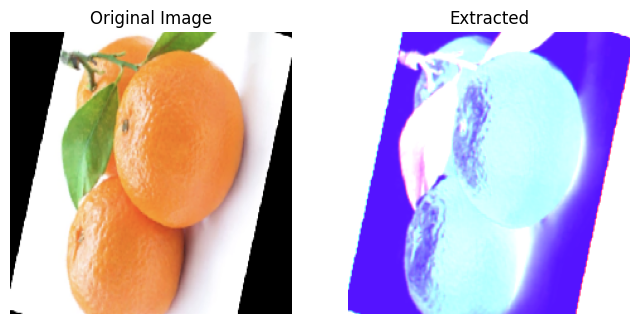

In [255]:
vis_img_proc(conv_only_model)

In [258]:
pool_only_model = Sequential([MaxPool2D(3, input_shape=(224, 224, 3))])
pool_only_model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 max_pooling2d_5 (MaxPoolin  (None, 74, 74, 3)         0         
 g2D)                                                            
                                                                 
Total params: 0 (0.00 Byte)
Trainable params: 0 (0.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


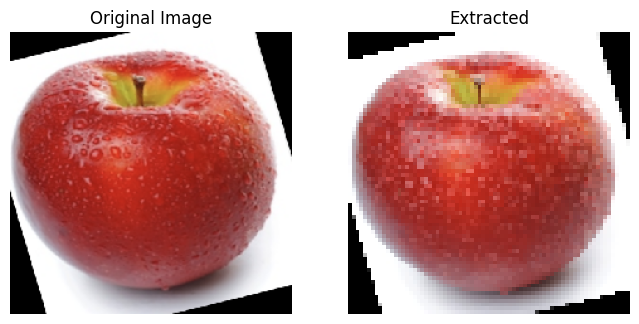

In [259]:
vis_img_proc(pool_only_model)

In [262]:
tinyvgg = Sequential([
    Conv2D(3, 2, input_shape=(224, 224, 3)),
    MaxPool2D(3),
    Conv2D(3, 2),
    MaxPool2D(3),
    Conv2D(3, 2),
])

In [263]:
tinyvgg.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 223, 223, 3)       39        
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 74, 74, 3)         0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 73, 73, 3)         39        
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 24, 24, 3)         0         
 g2D)                                                            
                                                                 
 conv2d_9 (Conv2D)           (None, 23, 23, 3)         39        
                                                                 
Total params: 117 (468.00 Byte)
Trainable params: 117 

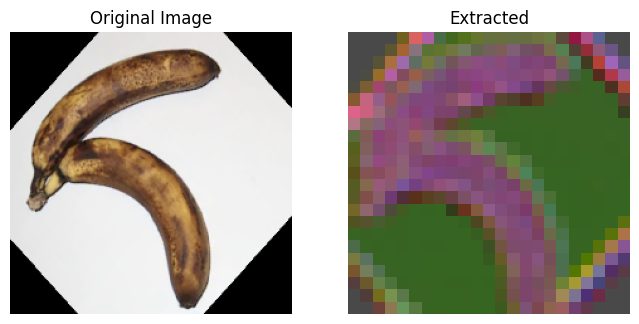

In [273]:
vis_img_proc(tinyvgg)